In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import numpy as np

## Extract data functions

In [3]:
def extract_data_state(base_directory, state):
    '''
    Extract the data from the TCR Data folder for a given state (F or R)

    ***Parameters***
    state: str, the state of the data to extract (F or R)

    ***Returns***
    data_list: list, a list of dataframes containing the data for the given scale
    ''' 
    data_list = []
    file_list = []
    for i in range(1, 22): # go through all the 21 patients
        file_folder = os.path.join(base_directory, f"Pt{i}")
        if os.path.exists(file_folder):
            file_list = [f for f in os.listdir(file_folder) if state in f] # extract the files with the given state
            for file in file_list:
                file_path = os.path.join(file_folder, file)
                data = pd.read_csv(file_path)
                data_list.append(data)
    return file_list, data_list

def extract_data_patients(base_directory, num):
    '''
    Extract the data from the TCR Data folder for a given patient

    ***Parameters***
    num: int, the patient number

    ***Returns***
    data_list: list, a list of dataframes containing the data for the given scale
    ''' 
    data_list = []
    file_list = []
    file_folder = os.path.join(base_directory, f"Pt{num}")
    if os.path.exists(file_folder):
        file_list = [f for f in os.listdir(file_folder) if 'metadata' not in f] # will skip the metadata file
        for file in file_list:
            file_path = os.path.join(file_folder, file)
            data = pd.read_csv(file_path)
            data_list.append(data)
    return file_list, data_list


## Load data

In [7]:
# loading all the Flare time points
base_directory = "D:/desktop/PCM__EHR/pigeon/data/TCR Data" # should be the path to the TCR Data folder on your device

file_list_F, data_list_F = extract_data_state(base_directory, 'F')
file_list_R, data_list_R = extract_data_state(base_directory, 'R')

# concatenate all the data into one dataframe
data_F = pd.concat(data_list_F, ignore_index=True)
data_R = pd.concat(data_list_R, ignore_index=True)

data_F.head()

data_F['VJ'] = data_F['v'] + '_' + data_F['j']
data_R['VJ'] = data_R['v'] + '_' + data_R['j']

data_F.head()

,count,freq,cdr3nt,cdr3aa,v,d,j,VEnd,DStart,DEnd,JStart,VJ
0,1,0.000007,TGCAGTGCCAGCAGTTTAGGGACAGGGGTAAGGTACGAGCAGTACTTC,CSASSLGTGVRYEQYF,TRBV20-1,TRBD1,TRBJ2-7,8,NaN,2.0,33,TRBV20-1_TRBJ2-7
1,1,0.000007,TGCAGTGCCAGCATGAGCGGGTACGAGCAGTACTTC,CSASMSGYEQYF,TRBV20-1,TRBD2,TRBJ2-7,8,NaN,2.0,21,TRBV20-1_TRBJ2-7
2,1,0.000007,TGCAGTGCCATATGGGTGCAGGGCGAGCAGTACTTC,CSAIWVQGEQYF,TRBV20-1,"TRBD1, TRBD2",TRBJ2-1,8,NaN,2.0,24,TRBV20-1_TRBJ2-1
3,1,0.000007,TGCAGTGCGAGGACAGGGGTGAGCTACGAGCAGTACTTC,CSARTGVSYEQYF,TRBV20-1,TRBD1,TRBJ2-1,8,NaN,2.0,27,TRBV20-1_TRBJ2-1
4,1,0.000007,TGCAGTGCTAAACTGTGGGGGGACTCGGCCATGTATCTCTGTGCCA...,CSAKLWGDSAMYLCASSSLRTAETQYF,TRBV20-1,"TRBD1, TRBD2",TRBJ2-5,10,NaN,1.0,65,TRBV20-1_TRBJ2-5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


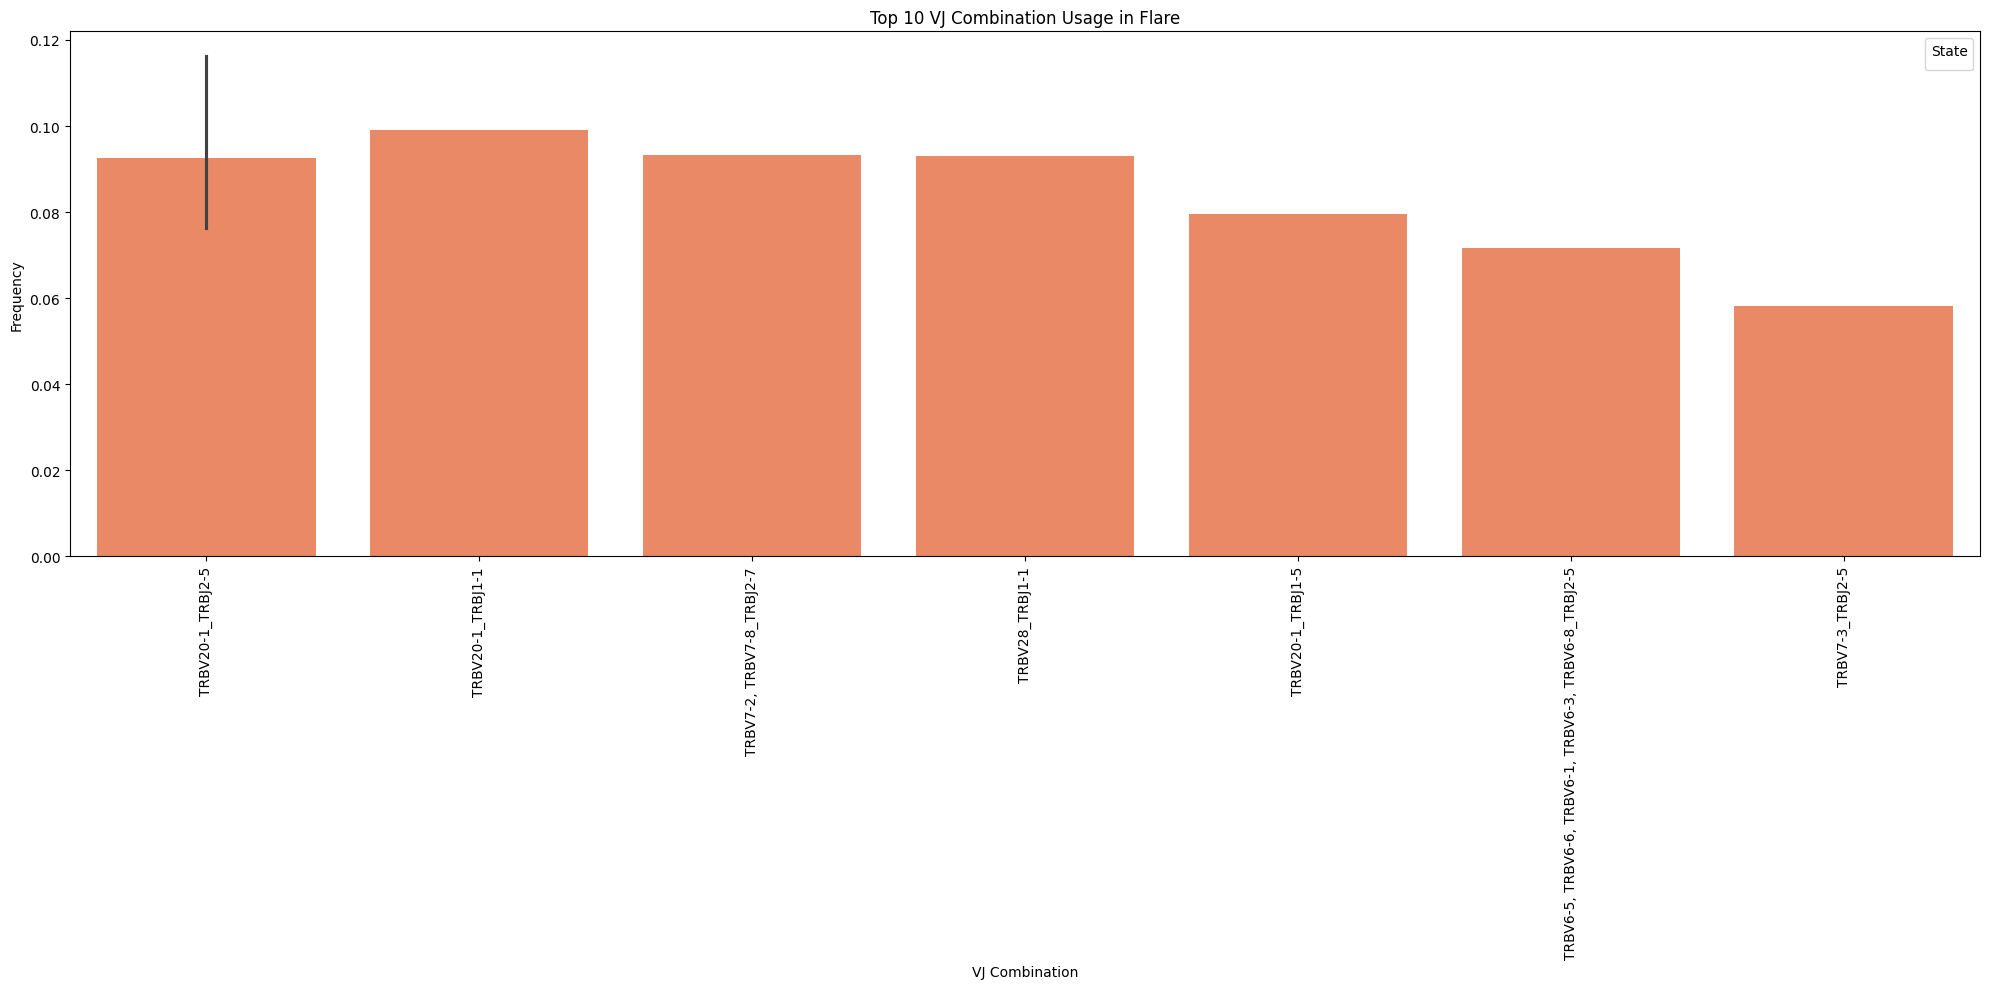

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


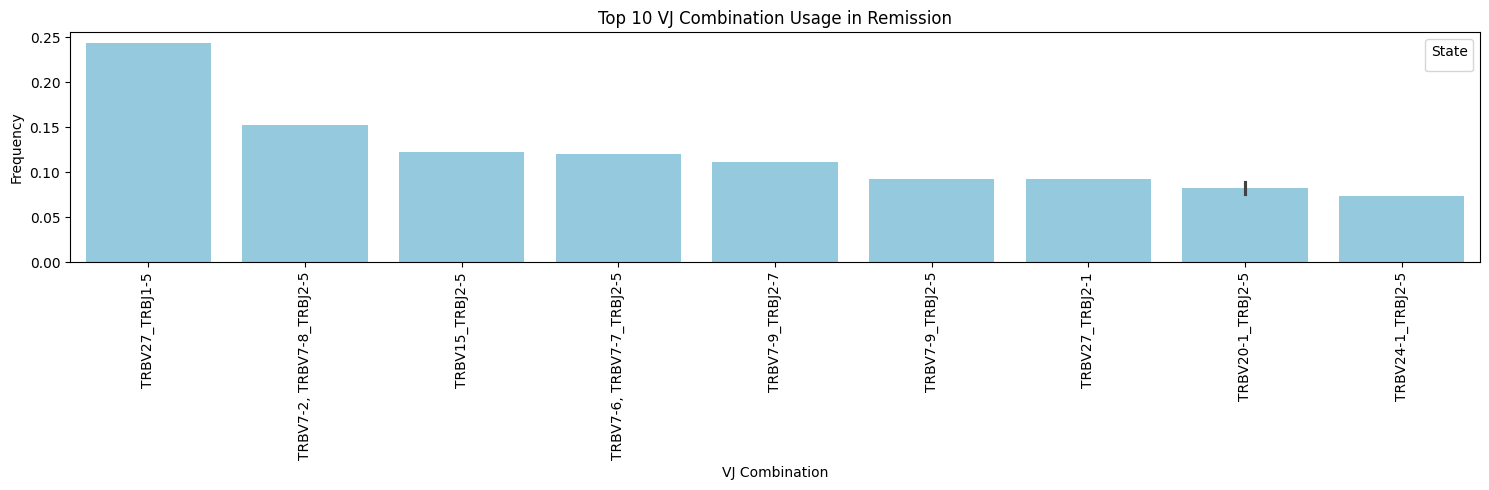

Num of different kinds of VJ combinations in Flare: 1783
Num of different kinds of VJ combinations in Remission: 1516


In [14]:
data_F['VJ'] = data_F['v'] + '_' + data_F['j']
data_R['VJ'] = data_R['v'] + '_' + data_R['j']


# Count the freq of each VJ combination
vj_count_F = data_F[['VJ', 'freq']].copy()
vj_count_F['state'] = 'Flare'

vj_count_R = data_R[['VJ', 'freq']].copy()
vj_count_R['state'] = 'Remission'

# Get the top 10 VJ combinations for Flare and Remission
top_10_vj_F = vj_count_F.nlargest(10, 'freq')
top_10_vj_R = vj_count_R.nlargest(10, 'freq')

# Flare
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_vj_F, x='VJ', y='freq', color='coral')
plt.xticks(rotation=90)
plt.xlabel('VJ Combination')
plt.ylabel('Frequency')
plt.title('Top 10 VJ Combination Usage in Flare')
plt.legend(title='State')
plt.tight_layout()
plt.show()

# Remission
plt.figure(figsize=(15, 5))
sns.barplot(data=top_10_vj_R, x='VJ', y='freq', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('VJ Combination')
plt.ylabel('Frequency')
plt.title('Top 10 VJ Combination Usage in Remission')
plt.legend(title='State')
plt.tight_layout()
plt.show()

# Count the number of unique VJ combinations
unique_vj_F = data_F['VJ'].nunique()
unique_vj_R = data_R['VJ'].nunique()
print(f"Num of different kinds of VJ combinations in Flare: {unique_vj_F}")
print(f"Num of different kinds of VJ combinations in Remission: {unique_vj_R}")